In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101) 
tf.set_random_seed(101)

In [3]:
data = pd.read_csv('nonlinear.csv')

In [4]:
data.head()

,y,x
0,-0.326168,0
1,2.783870,1
2,3.353969,2
3,4.513890,3
4,5.088536,4


In [16]:
# convert pandas columns to an array

x = data.iloc[:,1].values
y = data.iloc[:,0].values

In [17]:
n = len(x) # Number of data points 

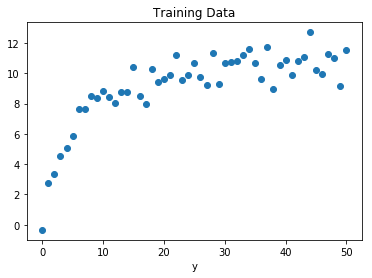

In [18]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show()

In [19]:
X = tf.placeholder("float") 
Y = tf.placeholder("float")

In [36]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [37]:
learning_rate = 0.01
training_epochs = 1000

In [38]:
# Hypothesis y~a*x/(b+x)
y_pred = tf.divide(tf.multiply(X, W),tf.add(b,X)) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer()

In [39]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 16.742538 W = 3.9132135 b = 0.018157605
Epoch 100 : cost = 7.642028 W = 6.010351 b = -0.16144395
Epoch 150 : cost = 4.1904426 W = 7.300965 b = 0.027201956
Epoch 200 : cost = 2.630826 W = 8.150813 b = 0.25145102
Epoch 250 : cost = 1.8462791 W = 8.736479 b = 0.46767896
Epoch 300 : cost = 1.4103544 W = 9.15626 b = 0.6698074
Epoch 350 : cost = 1.1455184 W = 9.468157 b = 0.85637844
Epoch 400 : cost = 0.9718966 W = 9.707695 b = 1.0276061
Epoch 450 : cost = 0.8508001 W = 9.897182 b = 1.1844736
Epoch 500 : cost = 0.76207626 W = 10.0510435 b = 1.3282783
Epoch 550 : cost = 0.69449234 W = 10.1789 b = 1.4603701
Epoch 600 : cost = 0.6414234 W = 10.287218 b = 1.5820364
Epoch 650 : cost = 0.59870833 W = 10.380628 b = 1.6944549
Epoch 700 : cost = 0.5636517 W = 10.462318 b = 1.7986639
Epoch 750 : cost = 0.5344093 W = 10.534671 b = 1.8955741
Epoch 800 : cost = 0.50969076 W = 10.599408 b = 1.9859769
Epoch 850 : cost = 0.4885594 W = 10.657852 b = 2.0705533
Epoch 900 : cost = 0.4703198 W 

In [40]:
# Calculating the predictions y~a*x/(b+x)
predictions = (weight * x)/(bias + x)
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 0.44052517 Weight = 10.80456 bias = 2.2948742 



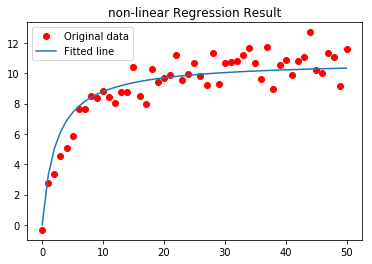

In [42]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('non-linear Regression Result') 
plt.legend() 
plt.show()